# EDA Dataset CICIDS2017 - Friday-Afternoon-DDoS (Normalizada, indice converitdo a timestamp, Ordenamiento, Creación de métricas)

## a) Cargar el dataset

In [76]:
# Carga del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/dataset_limpio.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")

## b) Inspección estructural del dataset

In [77]:
# Primeras 5 filas
df.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,...,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label,total_pkts,total_bytes
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-07 03:30:00,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,3,2,0,12,...,0.0,0,0,0.0,0.0,0,0,BENIGN,2,12
2017-07-07 03:30:00,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,109,1,1,6,...,0.0,0,0,0.0,0.0,0,0,BENIGN,2,12
2017-07-07 03:30:00,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,52,1,1,6,...,0.0,0,0,0.0,0.0,0,0,BENIGN,2,12
2017-07-07 03:30:00,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,34,1,1,6,...,0.0,0,0,0.0,0.0,0,0,BENIGN,2,12
2017-07-07 03:30:00,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,3,2,0,12,...,0.0,0,0,0.0,0.0,0,0,BENIGN,2,12


In [78]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225745 entries, 2017-07-07 03:30:00 to 2017-07-07 05:02:00
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flow_id                      225745 non-null  object 
 1   source_ip                    225745 non-null  object 
 2   source_port                  225745 non-null  int64  
 3   destination_ip               225745 non-null  object 
 4   destination_port             225745 non-null  int64  
 5   protocol                     225745 non-null  int64  
 6   flow_duration                225745 non-null  int64  
 7   total_fwd_packets            225745 non-null  int64  
 8   total_backward_packets       225745 non-null  int64  
 9   total_length_of_fwd_packets  225745 non-null  int64  
 10  total_length_of_bwd_packets  225745 non-null  int64  
 11  fwd_packet_length_max        225745 non-null  int64  
 12  fwd_packet_length_min   

In [79]:
# Tipo de dato de cada columna del dataset
df.dtypes

flow_id             object
source_ip           object
source_port          int64
destination_ip      object
destination_port     int64
                     ...  
idle_max             int64
idle_min             int64
label               object
total_pkts           int64
total_bytes          int64
Length: 86, dtype: object

In [80]:
print("Columnas:\n", df.columns)
print("Rango temporal: ")
print("Inicio: ", df.index.min())
print("Fin: ", df.index.max())

print("\nValores faltantes popr columna: ")
print(df.isna().sum())

Columnas:
 Index(['flow_id', 'source_ip', 'source_port', 'destination_ip',
       'destination_port', 'protocol', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
    

## c) Comportamiento temporal (por flujo) de algunas métricas

Gráfico exportado exitosamente a: ../results/02_01_comportamiento_temporal_paquetes_forward.png
Gráfico exportado exitosamente a: ../results/02_02_comportamiento_temporal_paquetes_backward.png
Gráfico exportado exitosamente a: ../results/02_03_comportamiento_temporal_tasa_de_bytes_por_flujo.png
Gráfico exportado exitosamente a: ../results/02_04_comportamiento_temporal_tasa_de_paquetes_por_flujo.png

Todos los gráficos han sido exportados exitosamente


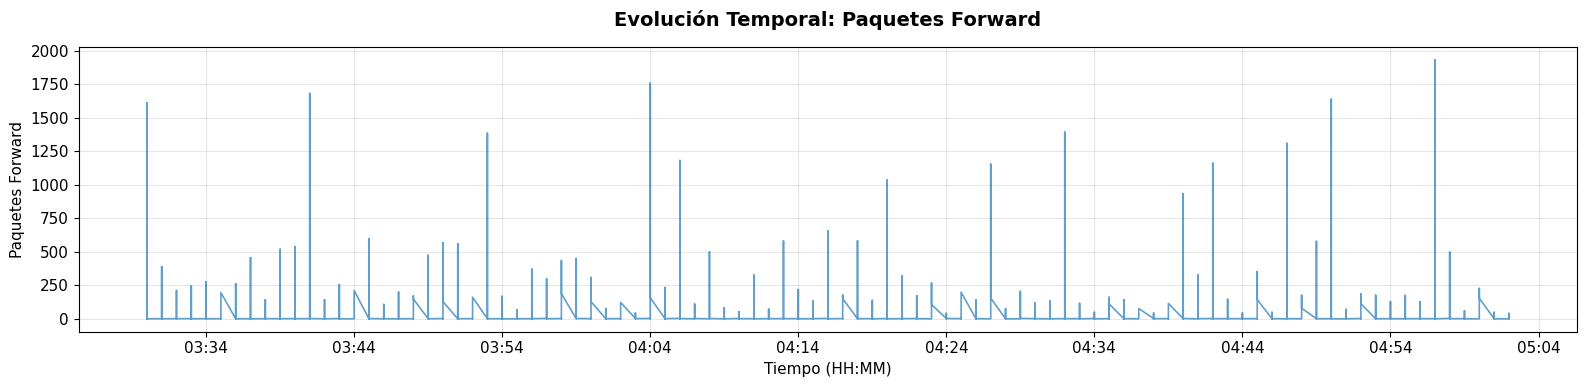

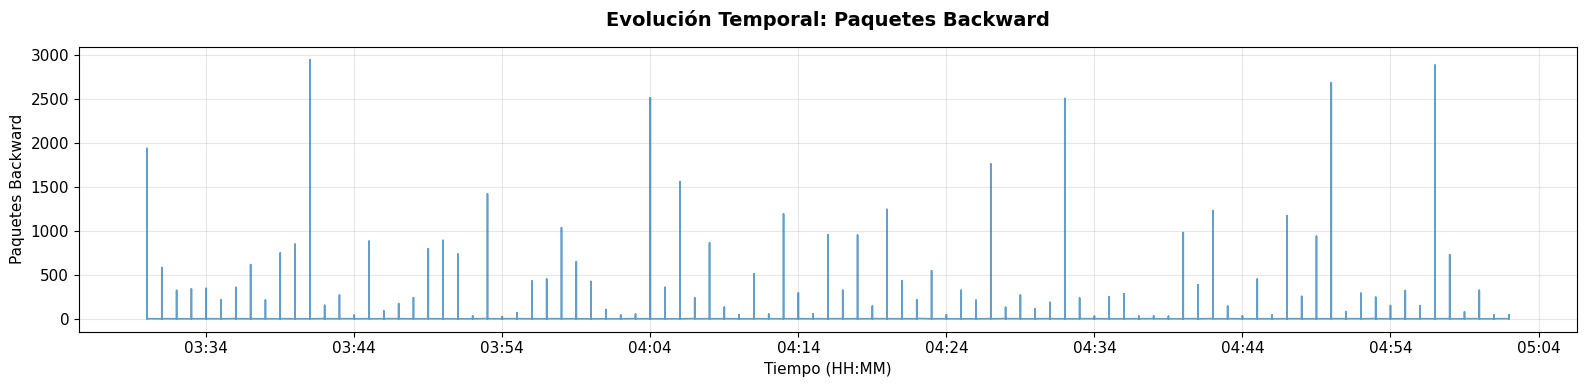

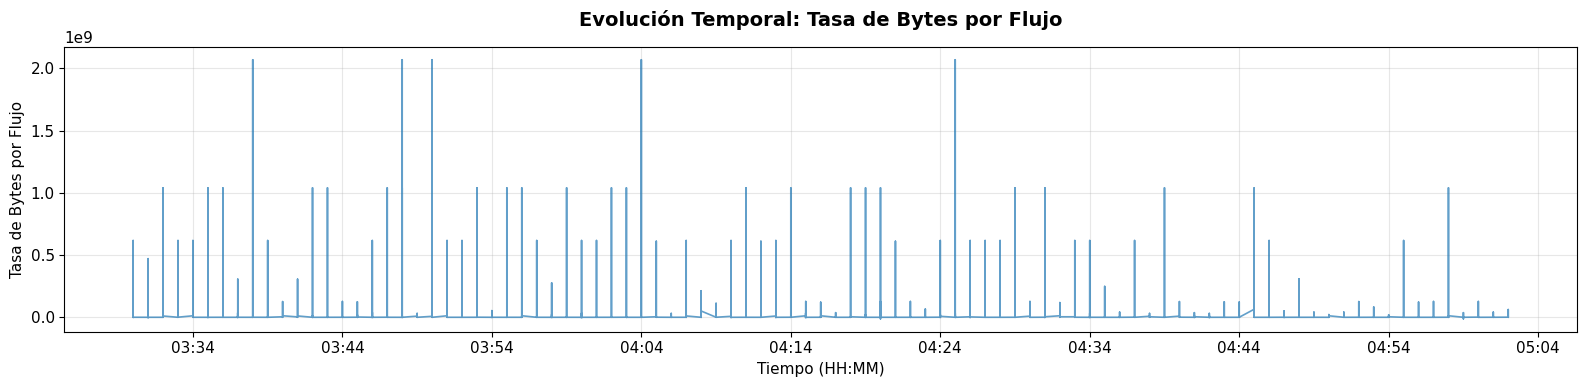

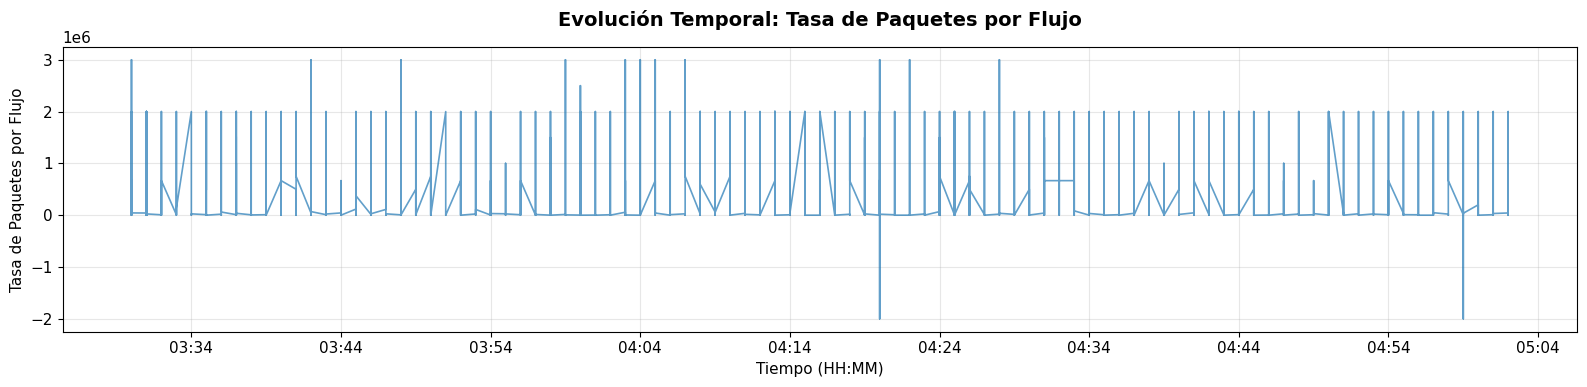

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Columnas del dataset que se van a graficar
cols_temporales = [
    "total_fwd_packets",
    "total_backward_packets", 
    "flow_bytes/s",
    "flow_packets/s"
]
# Titulo de cada gráfico generado
nombres_legibles = {
    "total_fwd_packets": "Paquetes Forward",
    "total_backward_packets": "Paquetes Backward", 
    "flow_bytes/s": "Tasa de Bytes por Flujo",
    "flow_packets/s": "Tasa de Paquetes por Flujo"
}

# Crear y exportar cada gráfico individualmente
for i, col in enumerate(cols_temporales, 1):
    plt.figure(figsize=(16, 4))
    plt.plot(df.index, df[col], alpha=0.7, color='#1f77b4', linewidth=1.2)
    plt.title(f"Evolución Temporal: {nombres_legibles[col]}", fontsize=14, fontweight='bold', pad=15)
    plt.xlabel("Tiempo (HH:MM)", fontsize=11)
    plt.ylabel(nombres_legibles[col], fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.tight_layout()
    
    numero = f"{i:02d}"  # Formato 01, 02, 03, etc.
    nombre_metrico = nombres_legibles[col].lower().replace(' ', '_')
    nombre_archivo = f"../results/02_{numero}_comportamiento_temporal_{nombre_metrico}.png"
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"Gráfico exportado exitosamente a: {nombre_archivo}")
    
print("\nTodos los gráficos han sido exportados exitosamente")
plt.show()

# EDA Serie temporal agregada por minuto (Dataset creado a partir del original con 11 métricas agrupadas por minuto)

## a) Carga de serie temporal

In [82]:
# Carga del dataset
df_ts = pd.read_csv("../data/processed/serie_temporal.csv") 
df_ts["timestamp"] = pd.to_datetime(df_ts["timestamp"])
df_ts = df_ts.set_index("timestamp")

## b) Insepcción estructrual

In [83]:
# Primeras 5 filas del dataset
df_ts.head()

,total_pkts,total_bytes,flow_bytes/s,flow_packets/s,flow_iat_mean,active_mean,idle_mean,num_ddos_flows,pkts_rate,bytes_rate,pkts_per_flow
timestamp,,,,,,,,,,,
2017-07-07 03:30:00,43583,35186405,inf,inf,6.884039e+05,118579.151464,3.247528e+06,0,726.383333,586440.083333,4.358300e+10
2017-07-07 03:31:00,27517,15873318,inf,inf,6.860297e+05,71027.774723,3.335710e+06,0,458.616667,264555.300000,2.751700e+10
2017-07-07 03:32:00,3899,1760887,4.675717e+06,9.102111e+04,6.338513e+05,33379.712885,4.343144e+06,0,64.983333,29348.116667,3.899000e+09
2017-07-07 03:33:00,16056,6351927,1.380671e+06,4.350707e+04,1.073293e+06,129475.865941,4.494442e+06,0,267.600000,105865.450000,1.605600e+10
2017-07-07 03:34:00,10606,5452445,1.349385e+06,4.824574e+04,6.350480e+05,40147.639813,2.939384e+06,0,176.766667,90874.083333,1.060600e+10


In [84]:
# Información del dataset
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2017-07-07 03:30:00 to 2017-07-07 05:02:00
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_pkts      93 non-null     int64  
 1   total_bytes     93 non-null     int64  
 2   flow_bytes/s    93 non-null     float64
 3   flow_packets/s  93 non-null     float64
 4   flow_iat_mean   93 non-null     float64
 5   active_mean     93 non-null     float64
 6   idle_mean       93 non-null     float64
 7   num_ddos_flows  93 non-null     int64  
 8   pkts_rate       93 non-null     float64
 9   bytes_rate      93 non-null     float64
 10  pkts_per_flow   93 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 8.7 KB


In [85]:
print("Columnas:\n", df_ts.columns)
print("Rango temporal: ")
print("Inicio: ", df_ts.index.min())
print("Fin: ", df_ts.index.max())

print("\nValores faltantes popr columna: ")
print(df_ts.isna().sum())

Columnas:
 Index(['total_pkts', 'total_bytes', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'active_mean', 'idle_mean', 'num_ddos_flows',
       'pkts_rate', 'bytes_rate', 'pkts_per_flow'],
      dtype='object')
Rango temporal: 
Inicio:  2017-07-07 03:30:00
Fin:  2017-07-07 05:02:00

Valores faltantes popr columna: 
total_pkts        0
total_bytes       0
flow_bytes/s      0
flow_packets/s    0
flow_iat_mean     0
active_mean       0
idle_mean         0
num_ddos_flows    0
pkts_rate         0
bytes_rate        0
pkts_per_flow     0
dtype: int64


## GRÁFICOS SERIES DE TIEMPO

### a) Graficos independientes de cada columna de la serie temporal

Gráfico exportado exitosamente a: ../results/03_01_total_de_paquetes.png
Gráfico exportado exitosamente a: ../results/03_02_total_de_bytes.png
Gráfico exportado exitosamente a: ../results/03_03_tasa_de_paquetes_por_s.png
Gráfico exportado exitosamente a: ../results/03_04_tasa_de_bytes_por_s.png
Gráfico exportado exitosamente a: ../results/03_05_bytes_por_s_por_flujo.png
Gráfico exportado exitosamente a: ../results/03_06_paquetes_por_s_por_flujo.png
Gráfico exportado exitosamente a: ../results/03_07_tiempo_entre_llegadas_promedio.png
Gráfico exportado exitosamente a: ../results/03_08_tiempo_activo_promedio.png
Gráfico exportado exitosamente a: ../results/03_09_tiempo_inactivo_promedio.png
Gráfico exportado exitosamente a: ../results/03_10_flujos_ddos.png

Todos los gráficos del panel han sido exportados exitosamente


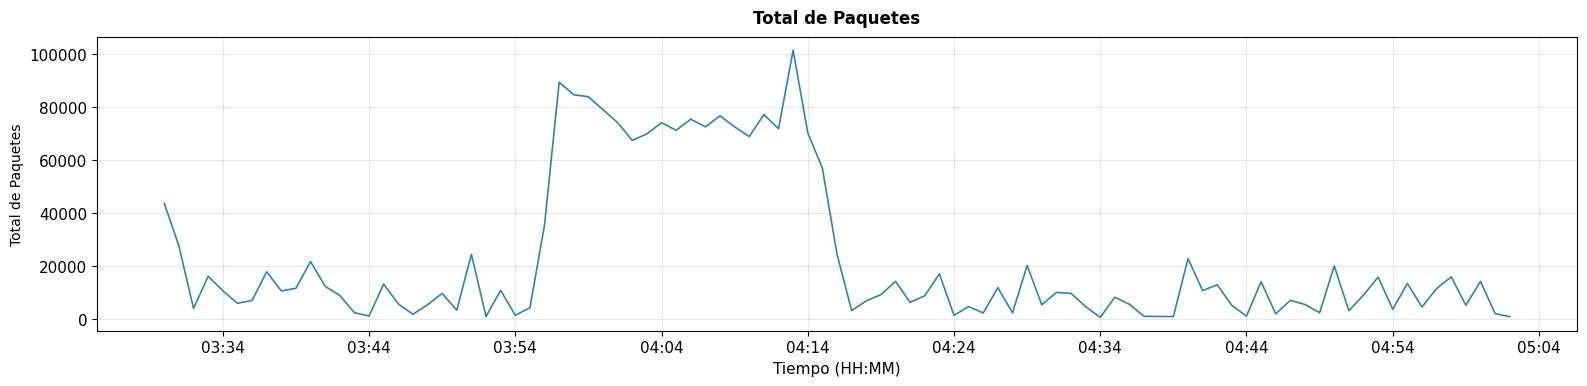

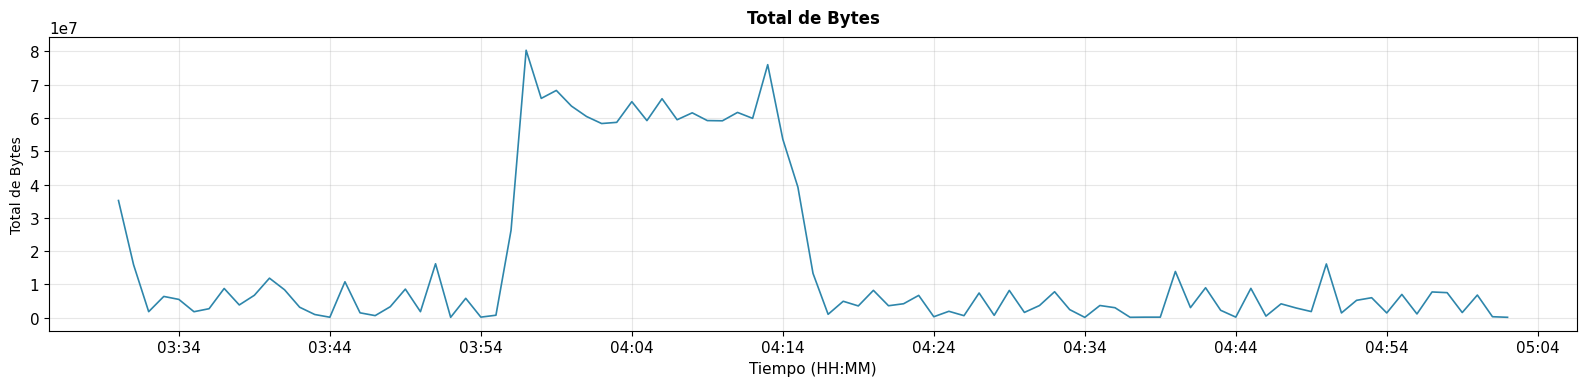

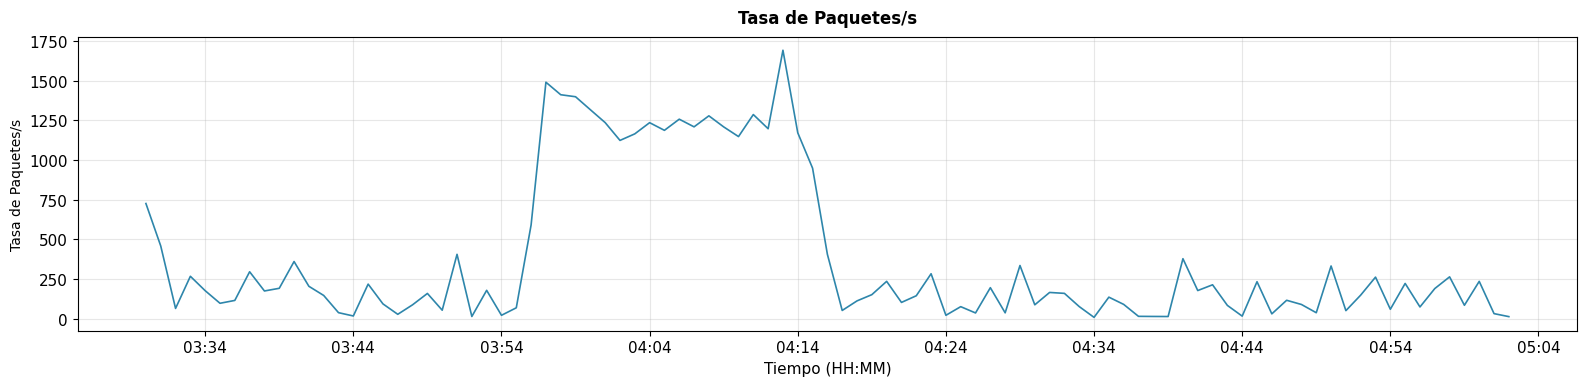

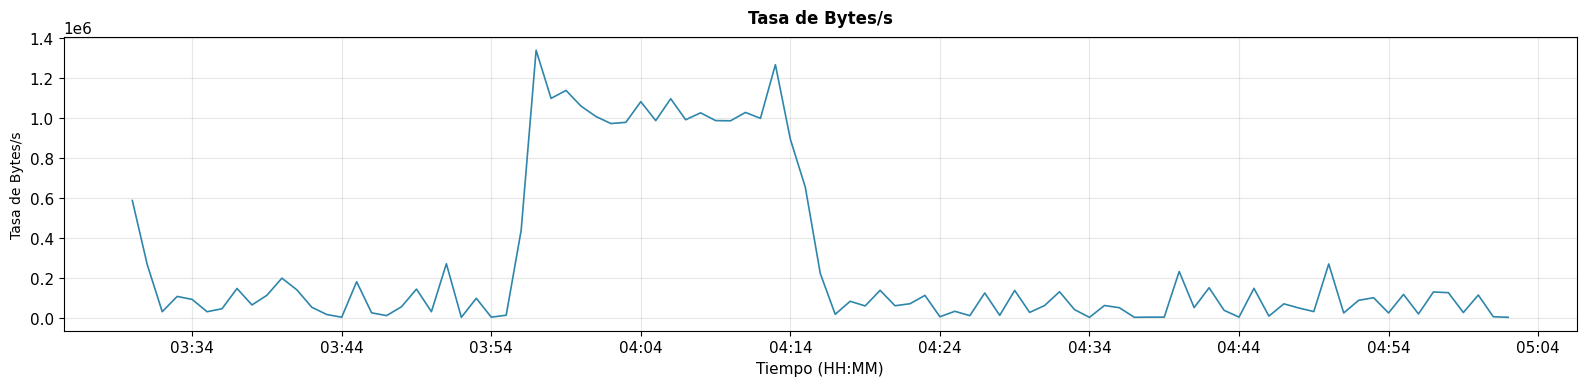

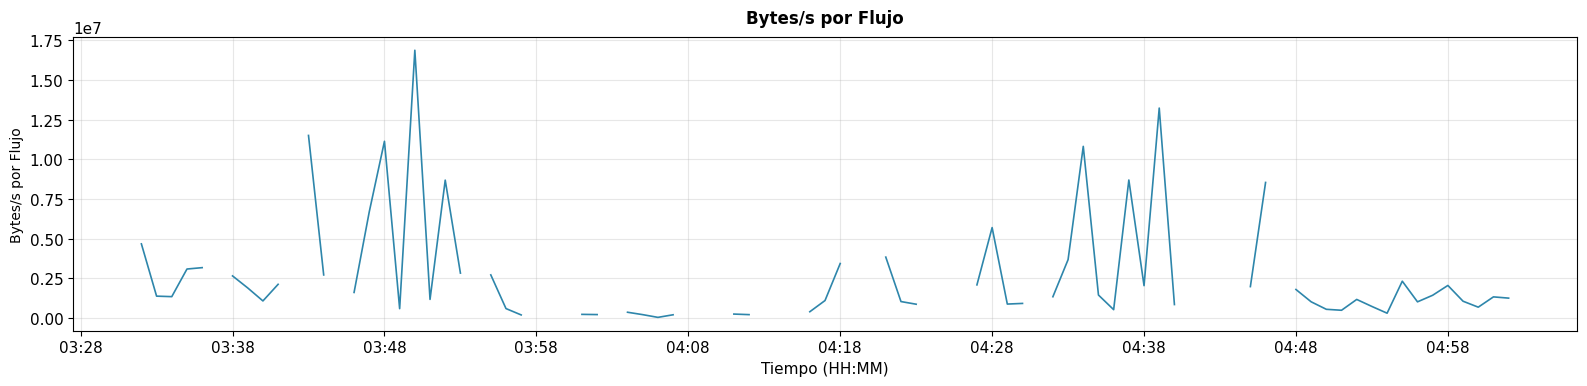

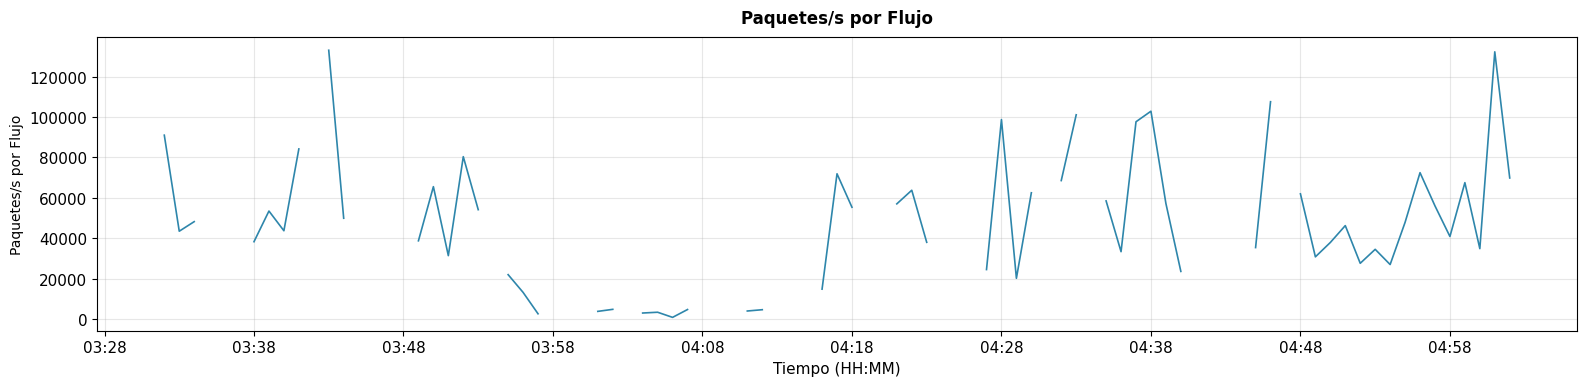

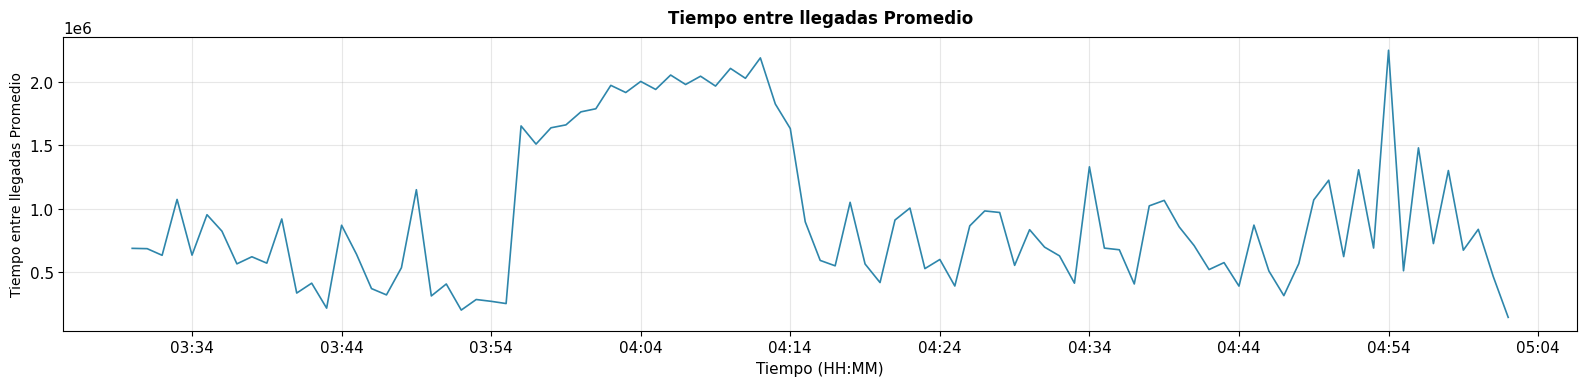

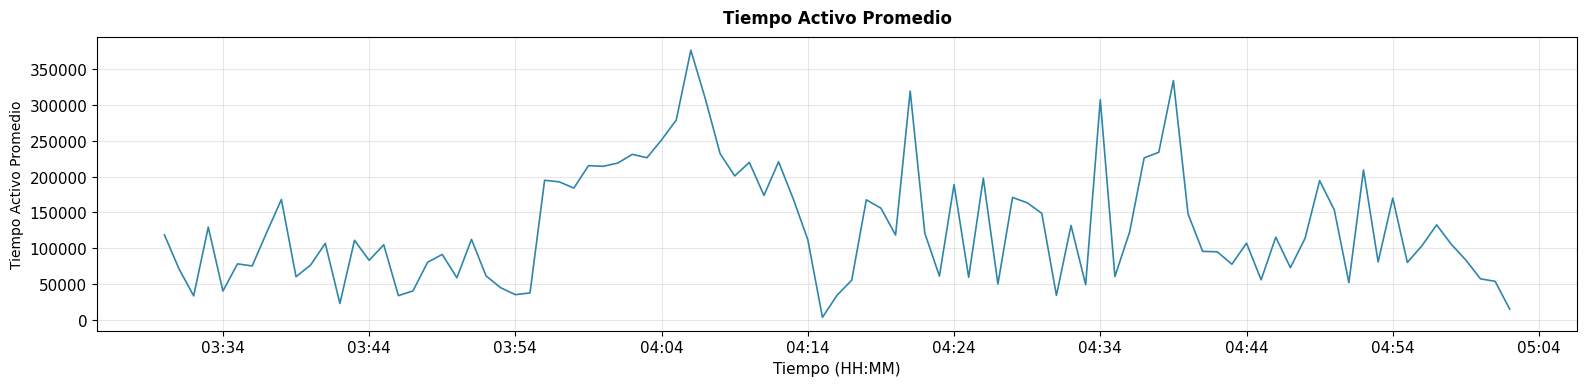

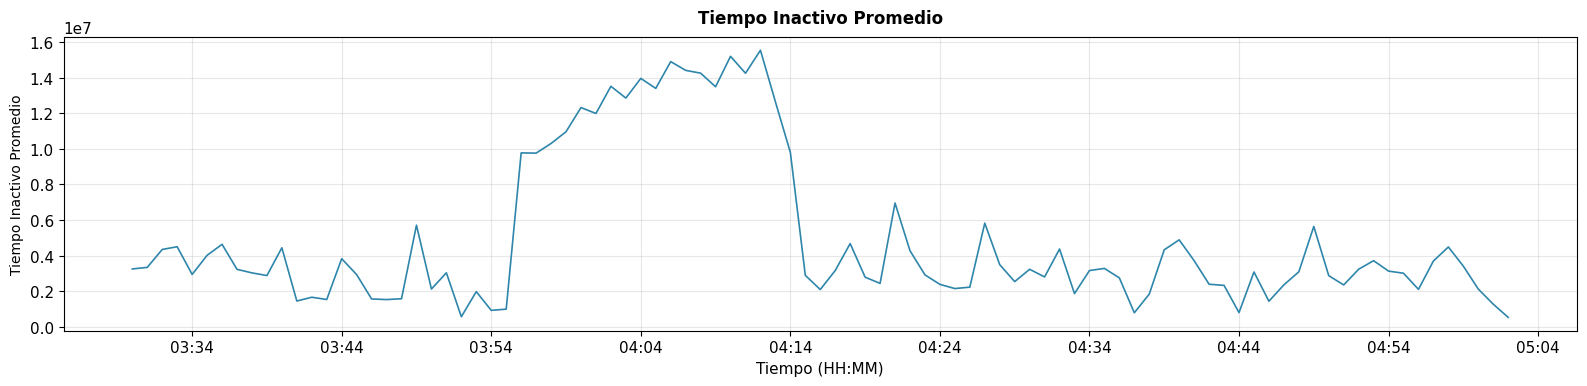

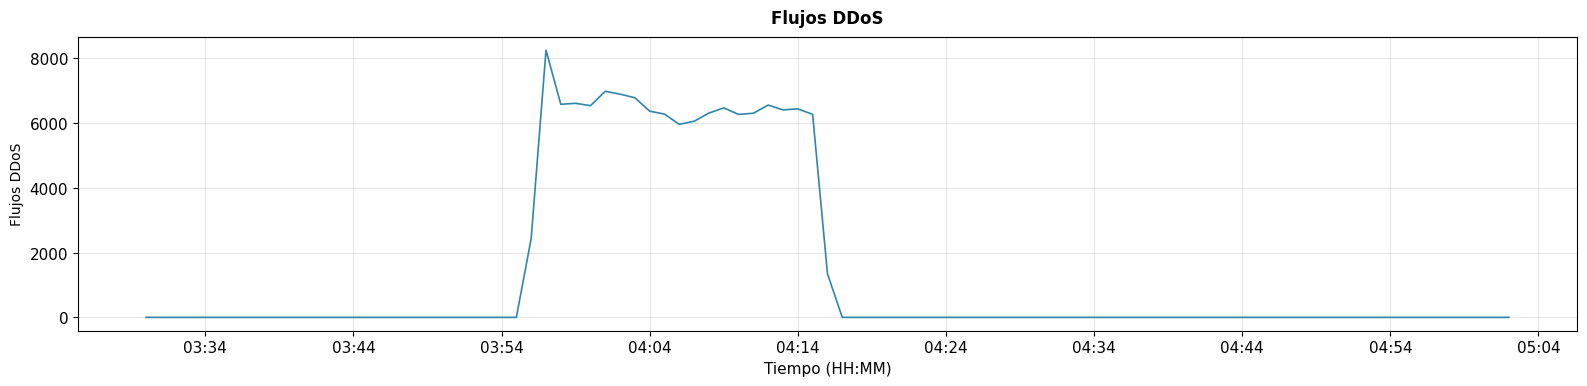

In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Columnas del dataset que se van a graficar
metrics_to_plot = [
    "total_pkts", "total_bytes", "pkts_rate", "bytes_rate",
    "flow_bytes/s", "flow_packets/s", "flow_iat_mean", 
    "active_mean", "idle_mean", "num_ddos_flows"
]
# Titulo de cada gráfico generado
nombres_metricas = {
    "total_pkts": "Total de Paquetes",
    "total_bytes": "Total de Bytes", 
    "pkts_rate": "Tasa de Paquetes/s",
    "bytes_rate": "Tasa de Bytes/s",
    "flow_bytes/s": "Bytes/s por Flujo",
    "flow_packets/s": "Paquetes/s por Flujo",
    "flow_iat_mean": "Tiempo entre llegadas Promedio",
    "active_mean": "Tiempo Activo Promedio",
    "idle_mean": "Tiempo Inactivo Promedio", 
    "num_ddos_flows": "Flujos DDoS"
}

for i, metric in enumerate(metrics_to_plot, 1):
    plt.figure(figsize=(16, 4))
    plt.plot(df_ts.index, df_ts[metric], color='#2E86AB', linewidth=1.2)
    plt.title(f"{nombres_metricas[metric]}", fontsize=12, fontweight='bold', pad=10)
    plt.ylabel(nombres_metricas[metric], fontsize=10)
    plt.xlabel("Tiempo (HH:MM)", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.tight_layout()
    
    # Exportar cada gráfico individualmente
    numero = f"{i:02d}"
    nombre_metrico = nombres_metricas[metric].lower().replace(' ', '_').replace('/', '_por_')
    nombre_archivo = f"../results/03_{numero}_{nombre_metrico}.png"
    
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"Gráfico exportado exitosamente a: {nombre_archivo}")
    
print("\nTodos los gráficos del panel han sido exportados exitosamente")
plt.show()


### b) Panel 2x2 de métricas candidatas para serie temporal principal

Gráfico exportado exitosamente a:  ../results/04_metricas_principales_ts.png


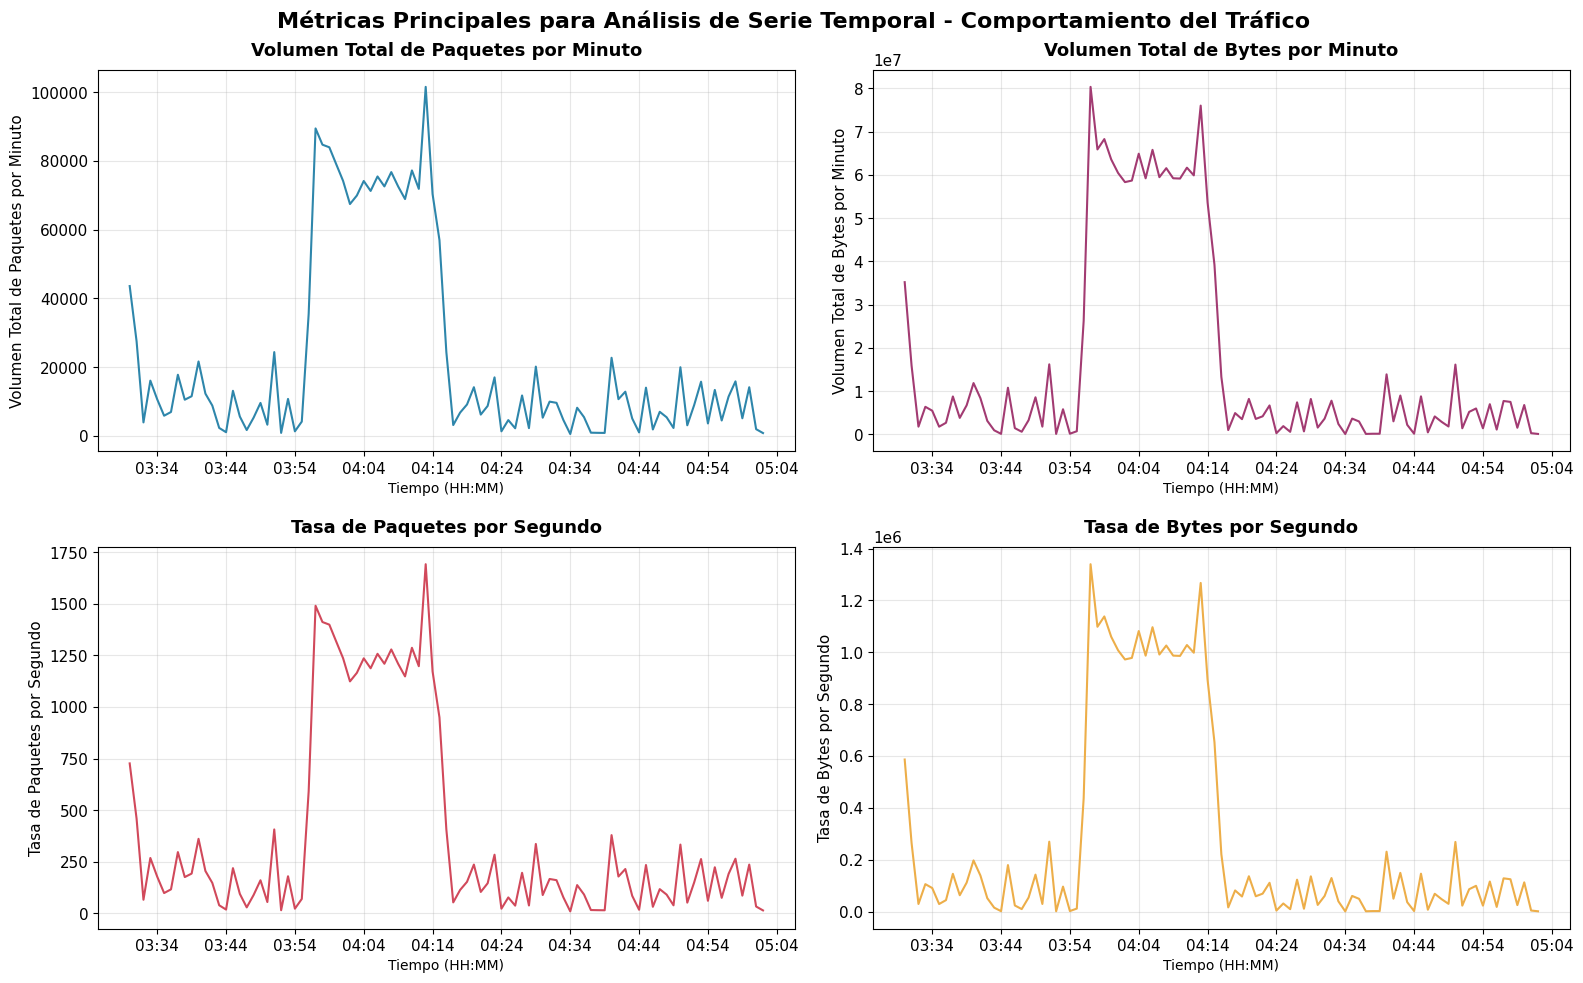

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Coolumnas del dataset que se van a graficar
metricas_fuertes = ["total_pkts", "total_bytes", "pkts_rate", "bytes_rate"]

# Titulo de cada subgráfico
titulos_fuertes = [
    "Volumen Total de Paquetes por Minuto",
    "Volumen Total de Bytes por Minuto", 
    "Tasa de Paquetes por Segundo",
    "Tasa de Bytes por Segundo"
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=False)
axes = axes.ravel()

colors = ['#2E86AB', '#A23B72', '#D1495B', '#EDAE49']

for i, metric in enumerate(metricas_fuertes):
    axes[i].plot(df_ts.index, df_ts[metric], color=colors[i], linewidth=1.5)
    axes[i].set_title(titulos_fuertes[i], fontsize=13, fontweight='bold', pad=10)
    axes[i].set_ylabel(titulos_fuertes[i], fontsize=11)
    axes[i].grid(True, alpha=0.3)
    axes[i].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[i].set_xlabel("Tiempo (HH:MM)", fontsize=10)

fig.suptitle("Métricas Principales para Análisis de Serie Temporal - Comportamiento del Tráfico", 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.25)

# Exportar el gráfico
ruta = "../results/04_metricas_principales_ts.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

### c) Panel 2x2 de métricas menos adecuadas para serie temporal principal

Gráfico exportado exitosamente a:  ../results/05_metricas_secundarias.png


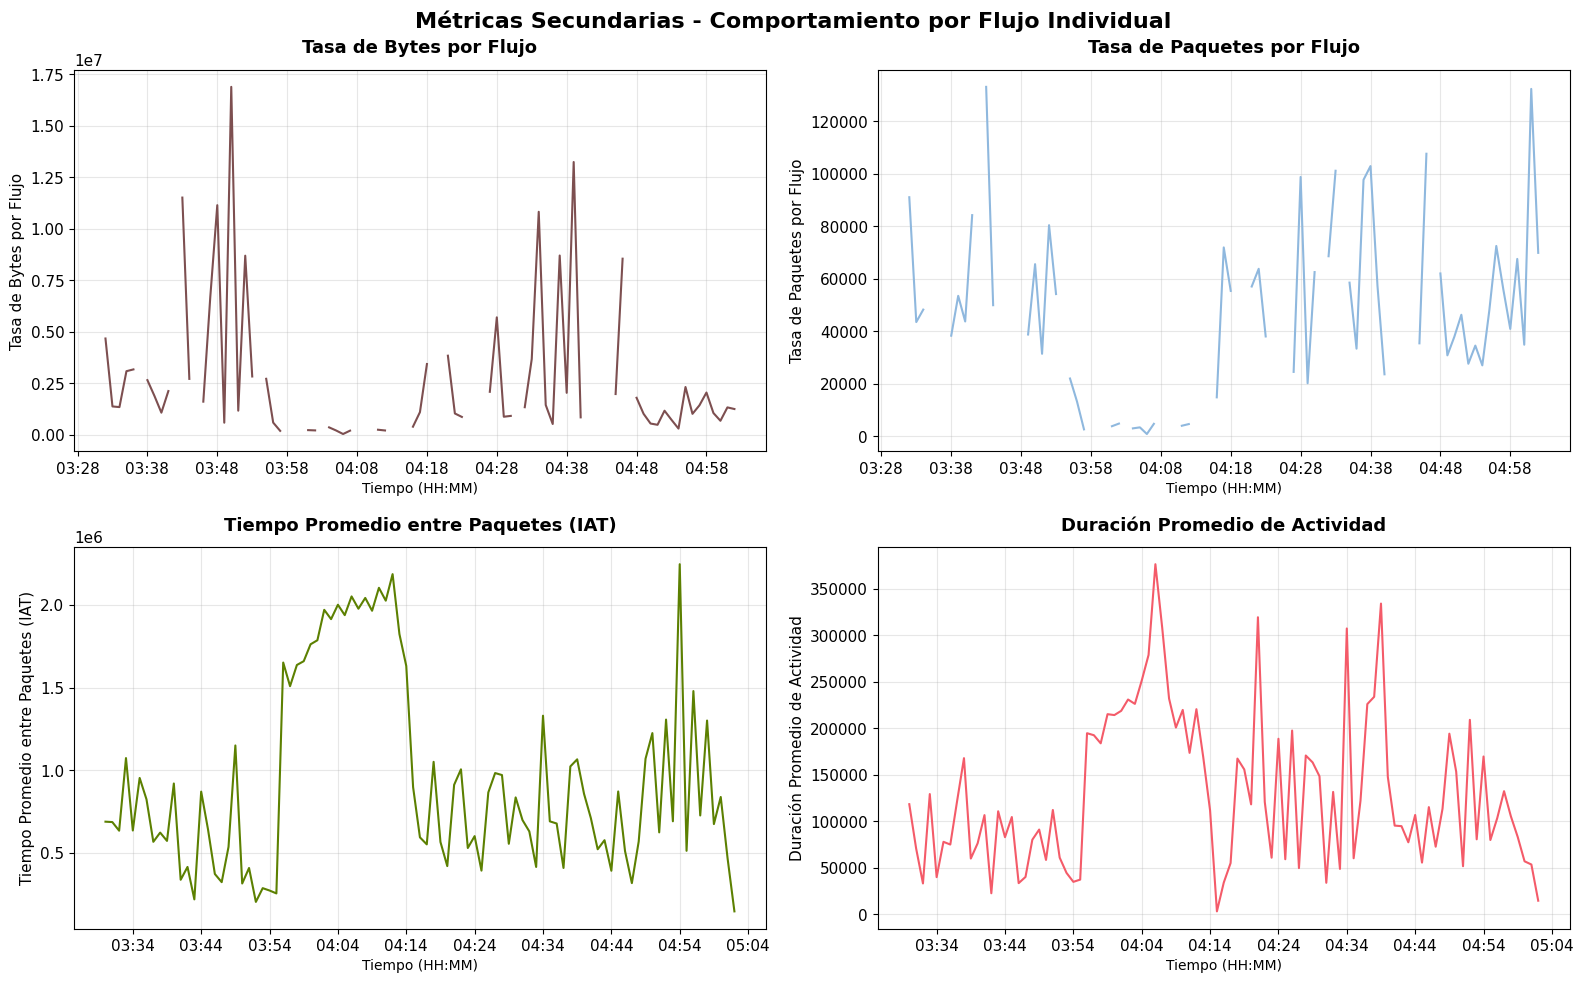

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Columnas del dataset a graficar
metricas_debiles = ["flow_bytes/s", "flow_packets/s", "flow_iat_mean", "active_mean"]

# Titulo de cada subgráfico
titulos_debiles = [
    "Tasa de Bytes por Flujo",
    "Tasa de Paquetes por Flujo",
    "Tiempo Promedio entre Paquetes (IAT)",
    "Duración Promedio de Actividad"
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=False)
axes = axes.ravel()

colors_sec = ['#7D4F50', '#8FB8DE', '#5C8001', '#F45B69']

for i, metric in enumerate(metricas_debiles):
    axes[i].plot(df_ts.index, df_ts[metric], color=colors_sec[i], linewidth=1.5)
    axes[i].set_title(titulos_debiles[i], fontsize=13, fontweight='bold', pad=12)
    axes[i].set_ylabel(titulos_debiles[i], fontsize=11)
    axes[i].grid(True, alpha=0.3)
    axes[i].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[i].set_xlabel("Tiempo (HH:MM)", fontsize=10)

fig.suptitle("Métricas Secundarias - Comportamiento por Flujo Individual", 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.25)

# Exportar el gráfico
ruta = "../results/05_metricas_secundarias.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

### d) Referencia temporal del ataque DDoS

Gráfico exportado exitosamente a:  ../results/06_referencia_temporal_ataque_ddos.png


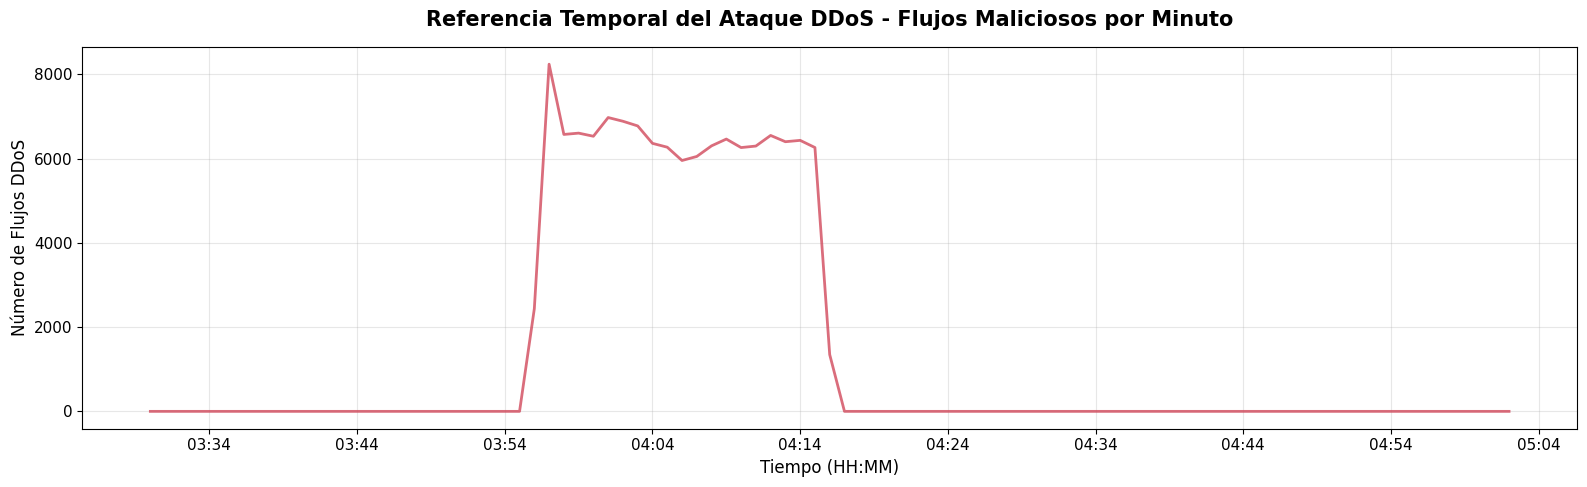

In [89]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(df_ts.index, df_ts["num_ddos_flows"], color='#D1495B', linewidth=2, alpha=0.8)
ax.set_title("Referencia Temporal del Ataque DDoS - Flujos Maliciosos por Minuto", 
             fontsize=15, fontweight='bold', pad=15)
ax.set_xlabel("Tiempo (HH:MM)", fontsize=12)
ax.set_ylabel("Número de Flujos DDoS", fontsize=12)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/06_referencia_temporal_ataque_ddos.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

## e) Gráfica ANTES / DURANTE / DESPUÉS del ataque

Identifiquemos las ventanas donde comienza y termina el ataque

In [90]:
# Se imprime en pantalla el incio y fin del ataque DDoS
print(df_ts[df_ts["num_ddos_flows"] > 0].index.min())
print(df_ts[df_ts["num_ddos_flows"] > 0].index.max())

inicio_ataque = df_ts[df_ts["num_ddos_flows"] > 0].index.min()
fin_ataque = df_ts[df_ts["num_ddos_flows"] > 0].index.max()

2017-07-07 03:56:00
2017-07-07 04:16:00


Gráfico exportado exitosamente a:  ../results/07_paquetes_por_minuto_antes_durante_despues.png


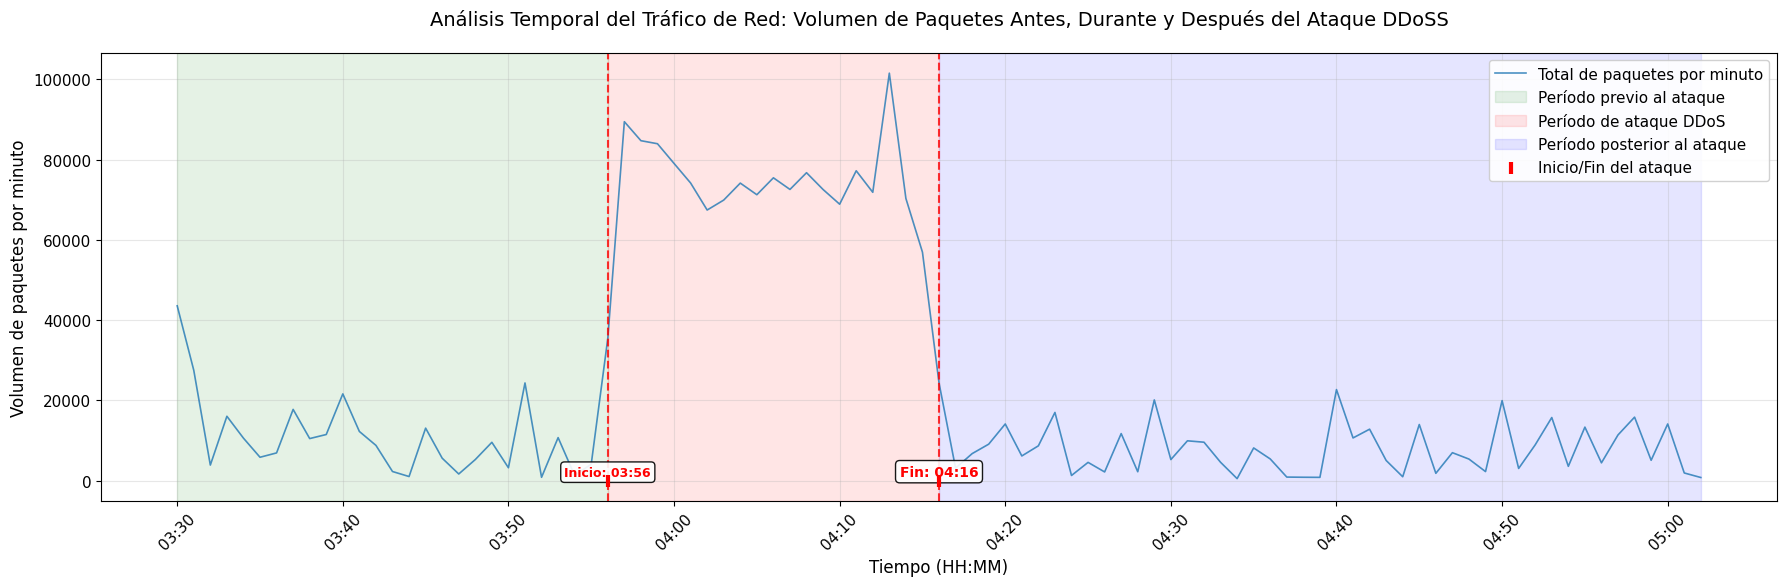

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18, 6))

ax = plt.gca()

# Señal principal
ax.plot(df_ts.index, df_ts["total_pkts"],
        label="Total de paquetes por minuto",
        alpha=0.8, color='#1f77b4', linewidth=1.2)

# Períodos de análisis
ax.axvspan(df_ts.index.min(), inicio_ataque,
           color='green', alpha=0.1, label="Período previo al ataque")
ax.axvspan(inicio_ataque, fin_ataque,
           color='red', alpha=0.1, label="Período de ataque DDoS")
ax.axvspan(fin_ataque, df.index.max(),
           color='blue', alpha=0.1, label="Período posterior al ataque")

# Puntos en el eje X para inicio y fin del ataque
ax.scatter([inicio_ataque, fin_ataque], [0, 0], color='red', s=80, zorder=5,
           label="Inicio/Fin del ataque", marker='|', linewidth=3)

# Líneas verticales
ax.axvline(x=inicio_ataque, color='red', linestyle='--', alpha=0.8, linewidth=1.5)
ax.axvline(x=fin_ataque, color='red', linestyle='--', alpha=0.8, linewidth=1.5)

# Horas en texto
inicio_str = inicio_ataque.strftime('%H:%M')
fin_str = fin_ataque.strftime('%H:%M')

# Colocar texto un poco por encima del eje X 
y_min, y_max = ax.get_ylim()
y_pos = y_min + (y_max - y_min) * 0.05     # 5% por encima del mínimo

ax.text(inicio_ataque, y_pos,
        f'Inicio: {inicio_str}',
        ha='center', va='bottom', fontsize=9,
        color='red', fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))

ax.text(fin_ataque, y_pos,
        f'Fin: {fin_str}',
        ha='center', va='bottom', fontsize=10,
        color='red', fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))

# Configuración de ejes y formato
ax.set_xlabel("Tiempo (HH:MM)", fontsize=12)
ax.set_ylabel("Volumen de paquetes por minuto", fontsize=12)

ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,10,20,30,40,50], interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
ax.set_ylim(y_min, y_max)

# Elementos finales
plt.title("Análisis Temporal del Tráfico de Red: Volumen de Paquetes Antes, Durante y Después del Ataque DDoSS",
          fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, framealpha=0.9)
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/07_paquetes_por_minuto_antes_durante_despues.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()


# ANÁLISIS ESTADÍSTICO

## a) Calcular Rolling mean (média movil)

Sirve para detectar tendencia y suavizar ruido

In [92]:
# Versión 1 --> Ventana de 5 minutos
df_ts["rolling_mean_5"] = df_ts["total_pkts"].rolling(window=5).mean()

# Versión 2 --> Ventana de 10 minutos
df_ts["rolling_mean_10"] = df_ts["total_pkts"].rolling(window=10).mean()

In [96]:
# Primeras 5 filas de la serie temporal
df_ts.head()

,total_pkts,total_bytes,flow_bytes/s,flow_packets/s,flow_iat_mean,active_mean,idle_mean,num_ddos_flows,pkts_rate,bytes_rate,pkts_per_flow,rolling_mean_5,rolling_mean_10,rolling_std_5,rolling_std_10
timestamp,,,,,,,,,,,,,,,
2017-07-07 03:30:00,43583,35186405,inf,inf,6.884039e+05,118579.151464,3.247528e+06,0,726.383333,586440.083333,4.358300e+10,NaN,NaN,NaN,NaN
2017-07-07 03:31:00,27517,15873318,inf,inf,6.860297e+05,71027.774723,3.335710e+06,0,458.616667,264555.300000,2.751700e+10,NaN,NaN,NaN,NaN
2017-07-07 03:32:00,3899,1760887,4.675717e+06,9.102111e+04,6.338513e+05,33379.712885,4.343144e+06,0,64.983333,29348.116667,3.899000e+09,NaN,NaN,NaN,NaN
2017-07-07 03:33:00,16056,6351927,1.380671e+06,4.350707e+04,1.073293e+06,129475.865941,4.494442e+06,0,267.600000,105865.450000,1.605600e+10,NaN,NaN,NaN,NaN
2017-07-07 03:34:00,10606,5452445,1.349385e+06,4.824574e+04,6.350480e+05,40147.639813,2.939384e+06,0,176.766667,90874.083333,1.060600e+10,20332.2,NaN,15613.74368,NaN


Gráfico exportado exitosamente a:  ../results/08_paquetes_por_minuto_antes_durante_despues_rolling_mean.png


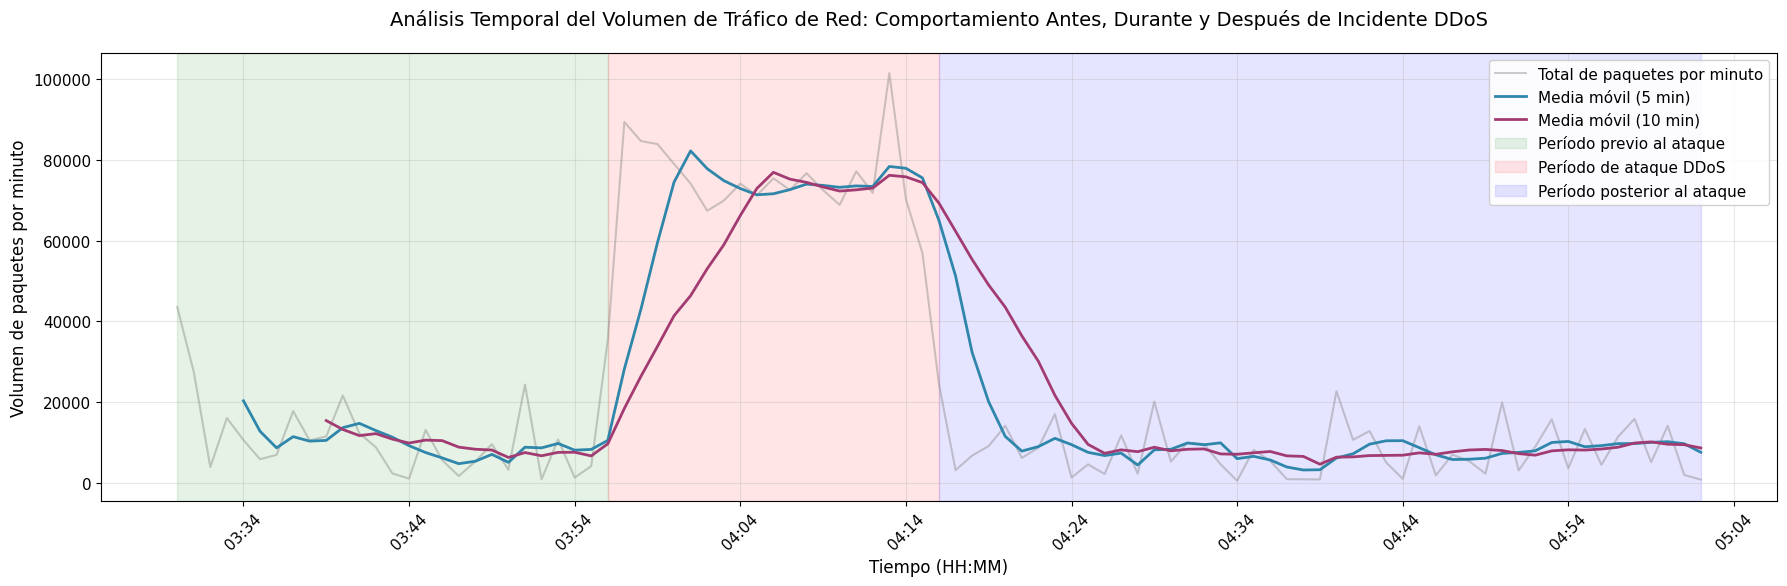

In [97]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18, 6))

# Señal principal y tendencias
plt.plot(df_ts.index, df_ts["total_pkts"], label="Total de paquetes por minuto", alpha=0.4, color='gray')
plt.plot(df_ts.index, df_ts["rolling_mean_5"], label="Media móvil (5 min)", linewidth=2, color='#2E86AB')
plt.plot(df_ts.index, df_ts["rolling_mean_10"], label="Media móvil (10 min)", linewidth=2, color='#A23B72')

# Períodos de análisis
plt.axvspan(df_ts.index.min(), inicio_ataque,
            color='green', alpha=0.1, label="Período previo al ataque")
plt.axvspan(inicio_ataque, fin_ataque,
            color='red', alpha=0.1, label="Período de ataque DDoS")
plt.axvspan(fin_ataque, df.index.max(),
            color='blue', alpha=0.1, label="Período posterior al ataque")

# Configuración de ejes y formato
plt.xlabel("Tiempo (HH:MM)", fontsize=12)
plt.ylabel("Volumen de paquetes por minuto", fontsize=12)

# Formato del eje temporal
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

# Elementos finales
plt.title("Análisis Temporal del Volumen de Tráfico de Red: Comportamiento Antes, Durante y Después de Incidente DDoS", 
          fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, framealpha=0.9)
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/08_paquetes_por_minuto_antes_durante_despues_rolling_mean.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

## b) Calcular rolling std (desviación móvil)

Sirve para evaluar estabilidad del tráfico y detectar variabilidad anómala

In [98]:
# Versión 1 --> Ventana de 5 minutos
df_ts["rolling_std_5"] = df_ts["total_pkts"].rolling(window=5).std()

# Versión 2 --> Ventana de 10 minutos
df_ts["rolling_std_10"] = df_ts["total_pkts"].rolling(window=10).std()

In [99]:
# Las primeras 5 filas de la serie temporal
df_ts.head()

,total_pkts,total_bytes,flow_bytes/s,flow_packets/s,flow_iat_mean,active_mean,idle_mean,num_ddos_flows,pkts_rate,bytes_rate,pkts_per_flow,rolling_mean_5,rolling_mean_10,rolling_std_5,rolling_std_10
timestamp,,,,,,,,,,,,,,,
2017-07-07 03:30:00,43583,35186405,inf,inf,6.884039e+05,118579.151464,3.247528e+06,0,726.383333,586440.083333,4.358300e+10,NaN,NaN,NaN,NaN
2017-07-07 03:31:00,27517,15873318,inf,inf,6.860297e+05,71027.774723,3.335710e+06,0,458.616667,264555.300000,2.751700e+10,NaN,NaN,NaN,NaN
2017-07-07 03:32:00,3899,1760887,4.675717e+06,9.102111e+04,6.338513e+05,33379.712885,4.343144e+06,0,64.983333,29348.116667,3.899000e+09,NaN,NaN,NaN,NaN
2017-07-07 03:33:00,16056,6351927,1.380671e+06,4.350707e+04,1.073293e+06,129475.865941,4.494442e+06,0,267.600000,105865.450000,1.605600e+10,NaN,NaN,NaN,NaN
2017-07-07 03:34:00,10606,5452445,1.349385e+06,4.824574e+04,6.350480e+05,40147.639813,2.939384e+06,0,176.766667,90874.083333,1.060600e+10,20332.2,NaN,15613.74368,NaN


Gráfico exportado exitosamente a:  ../results/09_paquetes_por_minuto_antes_durante_despues_rolling_std.png


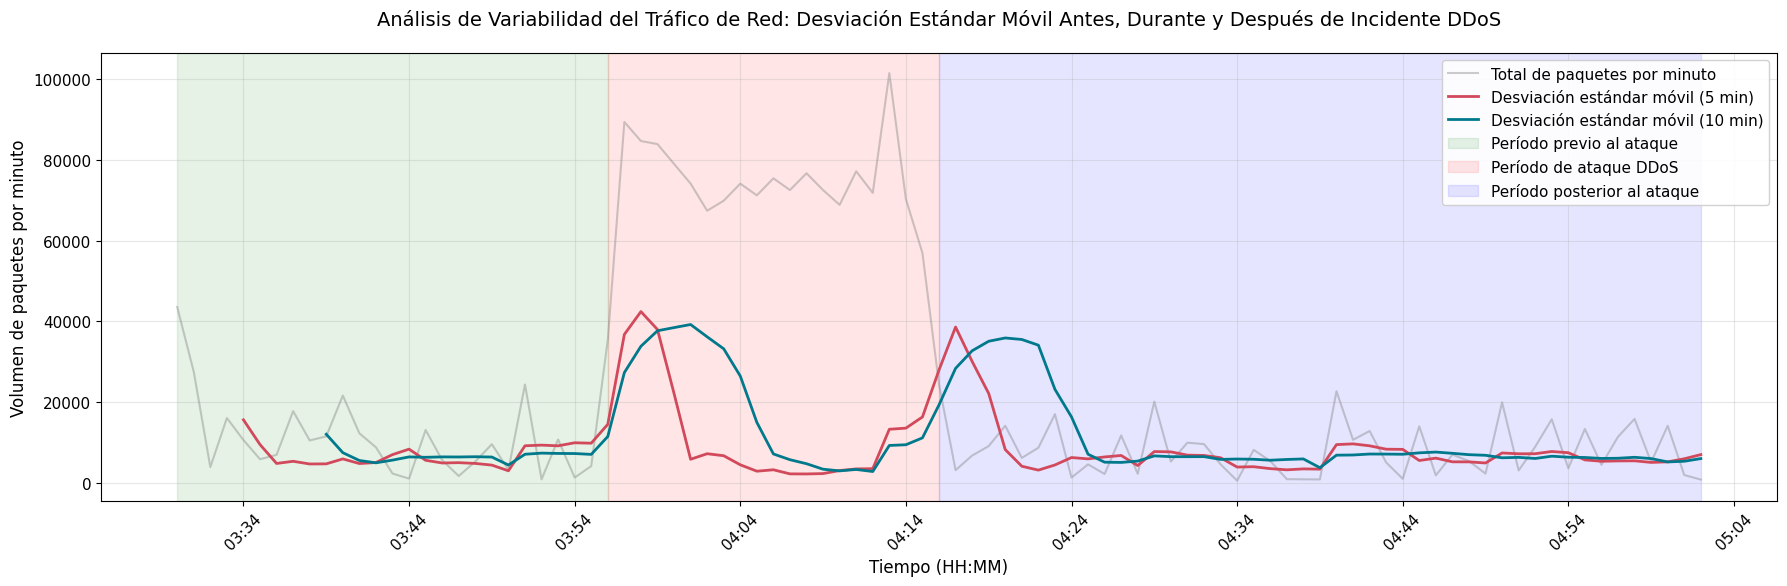

In [100]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18, 6))

# Señal principal y desviaciones estándar
plt.plot(df_ts.index, df_ts["total_pkts"], label="Total de paquetes por minuto", alpha=0.4, color='gray')
plt.plot(df_ts.index, df_ts["rolling_std_5"], label="Desviación estándar móvil (5 min)", linewidth=2, color='#D1495B')
plt.plot(df_ts.index, df_ts["rolling_std_10"], label="Desviación estándar móvil (10 min)", linewidth=2, color='#00798C')

# Períodos de análisis
plt.axvspan(df_ts.index.min(), inicio_ataque,
            color='green', alpha=0.1, label="Período previo al ataque")
plt.axvspan(inicio_ataque, fin_ataque,
            color='red', alpha=0.1, label="Período de ataque DDoS")
plt.axvspan(fin_ataque, df.index.max(),
            color='blue', alpha=0.1, label="Período posterior al ataque")

# Configuración de ejes y formato
plt.xlabel("Tiempo (HH:MM)", fontsize=12)
plt.ylabel("Volumen de paquetes por minuto", fontsize=12)

# Formato del eje temporal
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

# Elementos finales
plt.title("Análisis de Variabilidad del Tráfico de Red: Desviación Estándar Móvil Antes, Durante y Después de Incidente DDoS", 
          fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.legend(frameon=True, framealpha=0.9)
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/09_paquetes_por_minuto_antes_durante_despues_rolling_std.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

## c) Generar ACF y PACF

ACF --> Identifica correlaciones a disitnos lags

PACF --> Ayuda a determinar p (autoregresión) y q (media móvil)

Gráfico exportado exitosamente a:  ../results/10_ACF.png


<Figure size 1200x500 with 0 Axes>

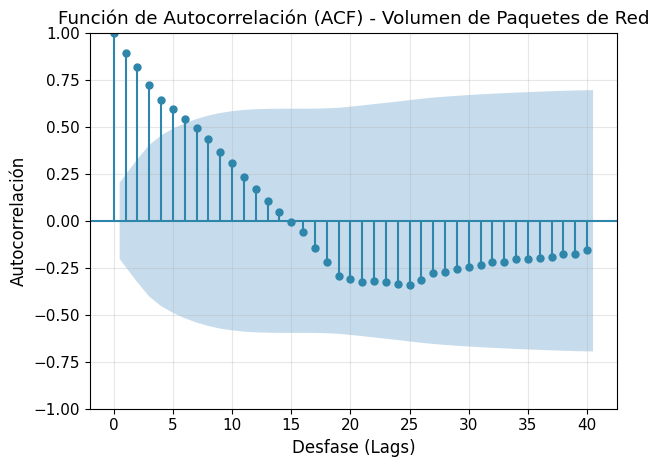

Gráfico exportado exitosamente a:  ../results/10_PACF.png


<Figure size 1200x500 with 0 Axes>

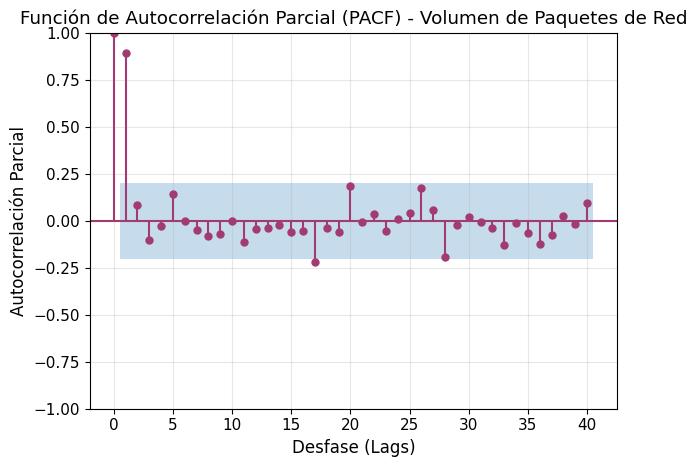

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Configuración para los gráficos
plt.rcParams.update({'font.size': 11, 'figure.titlesize': 14})

# Gráfico ACF
plt.figure(figsize=(12, 5))
plot_acf(df_ts["total_pkts"], lags=40, alpha=0.05, 
         title="Función de Autocorrelación (ACF) - Volumen de Paquetes de Red",
         color='#2E86AB', vlines_kwargs={'colors': '#2E86AB', 'linewidth': 1.5})
plt.grid(True, alpha=0.3)
plt.xlabel("Desfase (Lags)", fontsize=12)
plt.ylabel("Autocorrelación", fontsize=12)
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/10_ACF.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

# Gráfico PACF
plt.figure(figsize=(12, 5))
plot_pacf(df_ts["total_pkts"], lags=40, method="ywm", alpha=0.05,
          title="Función de Autocorrelación Parcial (PACF) - Volumen de Paquetes de Red",
          color='#A23B72', vlines_kwargs={'colors': '#A23B72', 'linewidth': 1.5})
plt.grid(True, alpha=0.3)
plt.xlabel("Desfase (Lags)", fontsize=12)
plt.ylabel("Autocorrelación Parcial", fontsize=12)
plt.tight_layout()

# Exportar el gráfico
ruta = "../results/10_PACF.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)
plt.show()

## d) Aplicar STL (Seasonal-Trend Decomposition)

STL divide la serie en (Tendencia, Estacionalidad, residuo)
Esto ayuda a evaluar si hay estacionalidad (aunquye en CICDS DDoS suele no haberla)

Gráfico exportado exitosamente a:  ../results/11_STL.png


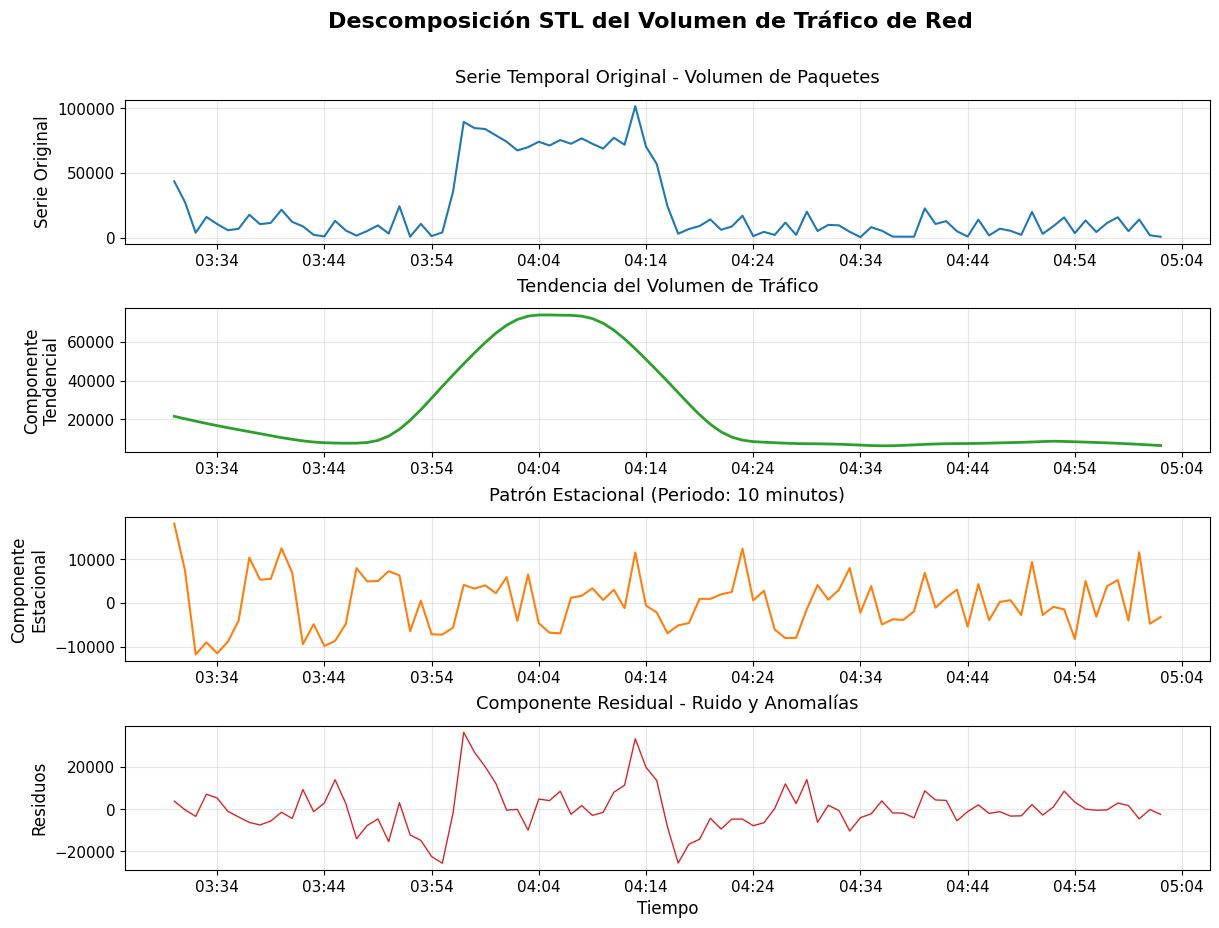

In [102]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Descomposición STL
stl = STL(df_ts["total_pkts"], period = 10)
resultado = stl.fit()

# Gráfico de los componentes
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

fig.suptitle('Descomposición STL del Volumen de Tráfico de Red',
             fontsize=16, fontweight='bold', y=0.97)

plt.subplots_adjust(hspace=0.45)

# Subplot 1
axes[0].plot(resultado.observed, color='#1f77b4', linewidth=1.5)
axes[0].set_ylabel('Serie Original', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Serie Temporal Original - Volumen de Paquetes', fontsize=13, pad=12)
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[0].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

# Subplot 2
axes[1].plot(resultado.trend, color='#2ca02c', linewidth=2)
axes[1].set_ylabel('Componente\nTendencial', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Tendencia del Volumen de Tráfico', fontsize=13, pad=12)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

# Subplot 3
axes[2].plot(resultado.seasonal, color='#ff7f0e', linewidth=1.5)
axes[2].set_ylabel('Componente\nEstacional', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].set_title('Patrón Estacional (Periodo: 10 minutos)', fontsize=13, pad=12)
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[2].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

# Subplot 4 
axes[3].plot(resultado.resid, color='#d62728', linewidth=1)
axes[3].set_ylabel('Residuos', fontsize=12)
axes[3].set_xlabel('Tiempo', fontsize=12)
axes[3].grid(True, alpha=0.3)
axes[3].set_title('Componente Residual - Ruido y Anomalías', fontsize=13, pad=12)
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[3].xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

# Ajustar formato de fechas 
#fig.autofmt_xdate() 

# Exportar el gráfico
ruta = "../results/11_STL.png"
plt.savefig(ruta, dpi = 300, bbox_inches = 'tight',facecolor = 'white',edgecolor = 'none')

print("Gráfico exportado exitosamente a: ", ruta)

plt.show()